##IMAGE  CLASSIFICATION USING CNN IN AZURE ENVIRONMENT


This project aims to classify images of places using a Convolutional Neural Network (CNN) leveraging Azure's cloud services for efficient data processing, training, and deployment. It utilises Places365 dataset obtained from the Kaggle dataset and uploaded to Azure Blob Storage for cloud processing.

The project leverages cloud-based services to optimize data processing, enabling the handling of large image datasets efficiently. By utilizing distributed training, it accelerates the model training process across multiple computational resources, which is crucial for classifying images based on location scenes. This approach ensures scalability, faster model training, and enhanced performance in handling diverse and extensive datasets.

##1. Azure Storage Account Configuration

This script sets the access key for an Azure Data Lake Storage account in the Spark configuration, allowing seamless integration for data access and storage within Azure. It configures the authentication needed to interact with the specified storage account, enabling Spark jobs to read from and write to the Azure Data Lake.

In [0]:
storage_account_name = "imageclsstorage"
storage_account_access_key = "kmaBSHKUfduqlBSh6mcBxlbzHdCOlk6188egXKfqTRwxG1ovic3kl0vFv0mSjSTQkeveXg2ZfC3i+AStjAV65Q=="
spark.conf.set("fs.azure.account.key."+storage_account_name+".dfs.core.windows.net", storage_account_access_key)

In [0]:
# Configure Azure Storage account credentials
storage_account_name = "imageclsstorage"
storage_account_key = "kmaBSHKUfduqlBSh6mcBxlbzHdCOlk6188egXKfqTRwxG1ovic3kl0vFv0mSjSTQkeveXg2ZfC3i+AStjAV65Q=="
container_name = "input"
mount_point = "/mnt/input"

# Check if the mount point is already mounted and unmount it if necessary
if any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts()):
    dbutils.fs.unmount(mount_point)

# Mount the Azure Blob Storage container
dbutils.fs.mount(
  source = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/",
  mount_point = mount_point,
  extra_configs = {f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net": storage_account_key}
)

# Verify the mount
display(dbutils.fs.ls(mount_point))

## 2. Library Imports and Package Installation

This section installs essential packages and imports libraries required for machine learning, deep learning, and experiment tracking.


In [0]:
%pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Downloading mlflow-2.17.2-py3-none-any.whl (26.7 MB)
Collecting gunicorn<24
 Downloading gunicorn-23.0.0-py3-none-any.whl (85 kB)
Collecting sqlalchemy<3,>=1.4.0
 Downloading SQLAlchemy-2.0.36-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Requirement already satisfied: scipy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.2)
Requirement already satisfied: matplotlib<4 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.4.2)
Requirement already satisfied: pandas<3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: pyarrow<18,>=4.0.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (4.0.0)
Collecting Flask<4
 Downloading flask-3.0.3-py3-none-any.whl (101 kB)
Collecting docker<8,>=4.0.0
 Downloading docker-7.1.0-py3-none-any.whl (147 kB)
Collecting graphene<4
 Downloading graphene-3.4.3-py2.py3-none-any.whl (114 kB)
Collecting markdown<4,>=3.3
 Downloading Markdown-3.7-py3-none-any.whl (106 kB)
Requirement already satisfied: numpy<3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.20.1)
Requirement already satisfied: Jinja2<4,>=2.11 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.11.3)
Requirement already satisfied: scikit-learn<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.24.1)
Collecting alembic!=1.10.0,<2
 Downloading alembic-1.14.0-py3-none-any.whl (233 kB)
Collecting mlflow-skinny==2.17.2
 Downloading mlflow_skinny-2.17.2-py3-none-any.whl (5.7 MB)
Collecting cloudpickle<4
 Downloading cloudpickle-3.1.0-py3-none-any.whl (22 kB)
Collecting importlib-metadata!=4.7.0,<9,>=3.7.0
 Downloading importlib_metadata-8.5.0-py3-none-any.whl (26 kB)
Requirement already satisfied: requests<3,>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (2.25.1)
Requirement already satisfied: packaging<25 in /databricks/python3/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (20.9)
Collecting pyyaml<7,>=5.1
 Downloading PyYAML-6.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (746 kB)
Collecting opentelemetry-api<3,>=1.9.0
 Downloading opentelemetry_api-1.28.2-py3-none-any.whl (64 kB)
Collecting sqlparse<1,>=0.4.0
 Downloading sqlparse-0.5.2-py3-none-any.whl (44 kB)
Requirement already satisfied: protobuf<6,>=3.12.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (3.17.2)
Collecting opentelemetry-sdk<3,>=1.9.0
 Downloading opentelemetry_sdk-1.28.2-py3-none-any.whl (118 kB)
Collecting gitpython<4,>=3.1.9
 Downloading GitPython-3.1.43-py3-none-any.whl (207 kB)
Collecting click<9,>=7.0
 Downloading click-8.1.7-py3-none-any.whl (97 kB)
Collecting cachetools<6,>=5.0.0
 Downloading cachetools-5.5.0-py3-none-any.whl (9.5 kB)
Collecting databricks-sdk<1,>=0.20.0
 Downloading databricks_sdk-0.38.0-py3-none-any.whl (575 kB)
Collecting importlib-resources
 Downloading importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Collecting typing-extensions>=4
 Downloading typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Collecting Mako
 Downloading Mako-1.3.8-py3-none-any.whl (78 kB)
Collecting requests<3,>=2.17.3
 Downloading requests-2.32.3-py3-none-any.whl (64 kB)
Collecting google-auth~=2.0
 Downloading google_auth-2.36.0-py2.py3-none-any.whl (209 kB)
Collecting urllib3>=1.26.0
 Downloading urllib3-2.2.3-py3-none-any.whl (126 kB)
Collecting Werkzeug>=3.0.0
 Downloading werkzeug-3.0.6-py3-none-any.whl (227 kB)
Collecting Jinja2<4,>=2.11
 Downloading jinja2-3.1.4-py3-none-any.whl (133 kB)
Collecting itsdangerous>=2.1.2
 Downloading itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Collecting blinker>=1.6.2
 Downloading blinker-1.8.2-py3-none-any.whl (9.5 kB)
Collecting gitdb<5,>=4.0.1
 Downloading gitdb-4.0.11-py3-none-any.whl (62 kB)
Collecting smmap<6,>=3.0.1
 Downloading smmap-5.0.1-py3-none-any.whl (24 kB)
Colle

In [0]:
%pip install keras

Python interpreter will be restarted.
Collecting keras
 Downloading keras-2.15.0-py3-none-any.whl (1.7 MB)
Installing collected packages: keras
Successfully installed keras-2.15.0
Python interpreter will be restarted.

In [0]:
%pip install tensorflow mlflow

Python interpreter will be restarted.
Collecting tensorflow
 Downloading tensorflow-2.13.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (479.6 MB)
Requirement already satisfied: mlflow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (2.17.2)
Requirement already satisfied: gunicorn<24 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (23.0.0)
Requirement already satisfied: sqlalchemy<3,>=1.4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (2.0.36)
Requirement already satisfied: scipy<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.6.2)
Requirement already satisfied: matplotlib<4 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (3.4.2)
Requirement already satisfied: pandas<3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.2.4)
Requirement already satisfied: pyarrow<18,>=4.0.0 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (4.0.0)
Requirement already satisfied: Flask<4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (3.0.3)
Requirement already satisfied: docker<8,>=4.0.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (7.1.0)
Requirement already satisfied: graphene<4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (3.4.3)
Requirement already satisfied: markdown<4,>=3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (3.7)
Requirement already satisfied: numpy<3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.20.1)
Requirement already satisfied: Jinja2<4,>=2.11 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (3.1.4)
Requirement already satisfied: scikit-learn<2 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.24.1)
Requirement already satisfied: alembic!=1.10.0,<2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (1.14.0)
Requirement already satisfied: mlflow-skinny==2.17.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow) (2.17.2)
Requirement already satisfied: cloudpickle<4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (3.1.0)
Requirement already satisfied: importlib-metadata!=4.7.0,<9,>=3.7.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (8.5.0)
Requirement already satisfied: requests<3,>=2.17.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (2.32.3)
Requirement already satisfied: packaging<25 in /databricks/python3/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (20.9)
Requirement already satisfied: pyyaml<7,>=5.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (6.0.2)
Requirement already satisfied: opentelemetry-api<3,>=1.9.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-skinny==2.17.2->mlflow) (1.28.2)
Requirement already satisfied: sqlparse<1,>=0.4.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages (from mlflow-

In [0]:
from pyspark.sql import SparkSession
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os

## 3. Exploratory Data Analysis

### 3.1 Data Preparation and Model Setup
The script imports TensorFlow utilities for image augmentation and model training optimization.This setup ensures efficient data loading, preprocessing, and model training.

In [0]:
# Importing necessary libraries
from pyspark.sql import SparkSession
import mlflow
import mlflow.keras

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Initialize Spark session
spark = SparkSession.builder.appName("ImageClassification").getOrCreate()

# Paths to datasets
data_paths = {
    '200_images': '/dbfs/mnt/input/200',
    '500_images': '/dbfs/mnt/input/500',
    '2000_images': '/dbfs/mnt/input/2000'
}

categories = ['Fountain', 'Gas Station', 'Glacier', 'Hayfield', 'Iceberg', 'Igloo', 'Lawn', 'Palace', 'Runway', 'Skyscraper']


### 3.2 Dataset Statistics Extraction and Preprocessing
The script defines a function to extract basic dataset statistics. It uses TensorFlow's ImageDataGenerator to preprocess images and compute these statistics for each dataset.







 


In [0]:
# Function to get basic statistics of the dataset
def get_dataset_statistics(data_path):
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    data = datagen.flow_from_directory(
        data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )
    num_images = data.samples
    num_classes = data.num_classes
    class_indices = data.class_indices
    return num_images, num_classes, class_indices

# Collect statistics for each dataset
dataset_statistics = {}
for key, path in data_paths.items():
    num_images, num_classes, class_indices = get_dataset_statistics(path)
    dataset_statistics[key] = {
        'num_images': num_images,
        'num_classes': num_classes,
        'class_indices': class_indices
    }

# Convert statistics to a Spark DataFrame for better visualization
stats_df = spark.createDataFrame([
    (key, stats['num_images'], stats['num_classes'], stats['class_indices'])
    for key, stats in dataset_statistics.items()
], ['Dataset', 'Number of Images', 'Number of Classes', 'Class Indices'])

display(stats_df)

Found 2000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 20000 images belonging to 10 classes.

Dataset,Number of Images,Number of Classes,Class Indices
200_images,2000,10,"Map(Fountain -> 0, Skyscrapper -> 9, Gas Station -> 1, Hayfield -> 3, Glacier -> 2, Runway -> 8, Igloo -> 5, Iceberg -> 4, Lawn -> 6, Palace -> 7)"
500_images,5000,10,"Map(Fountain -> 0, Skyscrapper -> 9, Gas Station -> 1, Hayfield -> 3, Glacier -> 2, Runway -> 8, Igloo -> 5, Iceberg -> 4, Lawn -> 6, Palace -> 7)"
2000_images,20000,10,"Map(Fountain -> 0, Skyscrapper -> 9, Gas Station -> 1, Hayfield -> 3, Glacier -> 2, Runway -> 8, Igloo -> 5, Iceberg -> 4, Lawn -> 6, Palace -> 7)"


### 3.3 Display Sample Images with Class Labels
The script creates a function to display sample images with class labels from a dataset and pPreprocesses images using ImageDataGenerator and loads a batch. Then visualizes images with their corresponding class names in a grid.


Found 2000 images belonging to 10 classes.

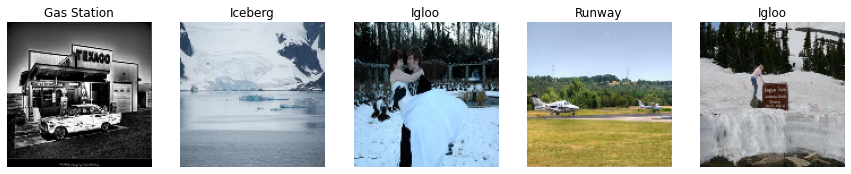

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_images(data_path, num_images=5):
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    data = datagen.flow_from_directory(
        data_path,
        target_size=(128, 128),
        batch_size=num_images,
        class_mode='categorical'
    )
    images, labels = next(data)
    class_indices = {v: k for k, v in data.class_indices.items()}
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_indices[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

# Display sample images from the '200_images' dataset
display_sample_images(data_paths['200_images'])

### 3.4 Data Preprocessing for Training and Validation
The script creates a function to preprocess data for training and validation using ImageDataGenerator and split data into training and validation sets.


In [0]:
def preprocess_data(data_path, img_size=(128, 128), batch_size=32):
    # Initialize ImageDataGenerator for rescaling and splitting data
    datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        validation_split=0.2
    )
     # Load training data (80%) and validation data (20%) from the directory
    train_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    # Load the validation data from the directory
    val_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
     # Return the training and validation data generators
    return train_data, val_data

##4. Model Building and Training

### 4.1 Building and Compiling CNN Model
The script builds a CNN model using TensorFlow/Keras with three convolutional layers, ReLU activation, and max-pooling for feature extraction. It includes a flattening layer, a dense layer with 128 neurons, and a softmax output layer for multi-class classification. The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.


In [0]:

def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### 4.2 Experiment Tracking and Model Saving with MLflow
The script utilizes MLflow to track experiments, log parameters, metrics,store results and save models. It also implements callbacks for early stopping and saving the best model.

In [0]:

import mlflow
import mlflow.keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

results = {}  # Initialize results dictionary

for dataset_name, path in data_paths.items():
    print(f"Processing dataset: {dataset_name}")
    train_data, val_data = preprocess_data(path)
    input_shape = train_data.image_shape
    num_classes = len(categories)

    with mlflow.start_run(run_name=f"{dataset_name}_run"):
        model = create_cnn_model(input_shape, num_classes)

        # Define paths for saving models
        best_model_path = f"./{dataset_name}_best_model.h5"

        # Define callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
            ModelCheckpoint(
                filepath=best_model_path,
                monitor='val_accuracy',
                save_best_only=True,
                mode='max',
                verbose=1
            )
        ]

        history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=10,
            callbacks=callbacks
        )

        # Log model parameters and metrics
        mlflow.log_param("dataset", dataset_name)
        mlflow.log_param("epochs", 10)
        mlflow.log_metric("max_accuracy", max(history.history['val_accuracy']))
        mlflow.log_metric("min_loss", min(history.history['val_loss']))

        print(f"Best model saved locally at {best_model_path} for dataset {dataset_name}.")

        # Evaluate and store results
        results[dataset_name] = {
            'accuracy': max(history.history['val_accuracy']),
            'loss': min(history.history['val_loss']),
            'history': history.history
        }

        # Optionally log the best model to MLflow
        mlflow.keras.log_model(model, f"best_model_{dataset_name}")

print("Training completed for all datasets.")


Processing dataset: 200_images
Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Epoch 1/10
 1/50 [..............................] - ETA: 2:02 - loss: 2.3361 - accuracy: 0.0000e+00 2/50 [>.............................] - ETA: 36s - loss: 2.5438 - accuracy: 0.0312  3/50 [>.............................] - ETA: 33s - loss: 2.4848 - accuracy: 0.0729 4/50 [=>............................] - ETA: 32s - loss: 2.4433 - accuracy: 0.0938 5/50 [==>...........................] - ETA: 32s - loss: 2.4137 - accuracy: 0.1000 6/50 [==>...........................] - ETA: 31s - loss: 2.3911 - accuracy: 0.1146 7/50 [===>..........................] - ETA: 30s - loss: 2.3773 - accuracy: 0.1161 8/50 [===>..........................] - ETA: 29s - loss: 2.3637 - accuracy: 0.1172 9/50 [====>.........................] - ETA: 29s - loss: 2.3549 - accuracy: 0.125010/50 [=====>........................] - ETA: 28s - loss: 2.3506 - accuracy: 0.134411/50 [=====>........................] - ETA: 27s - loss: 2.3451 - accuracy: 0.136412/50 [======>.......................] - ETA: 26s - loss: 2.3380 - accuracy: 0.140613/50 [======>.......................] - ETA: 25s - loss: 2.3313 - accuracy: 0.139414/50 [=======>......................] - ETA: 25s - loss: 2.3220 - accuracy: 0.160715/50 [========>.....................] - ETA: 24s - loss: 2.3144 - accuracy: 0.168816/50 [========>.....................] - ETA: 23s - loss: 2.2997 - accuracy: 0.175817/50 [=========>....................] - ETA: 22s - loss: 2.2913 - accuracy: 0.176518/50 [=========>....................] - ETA: 22s - loss: 2.2755 - accuracy: 0.177119/50 [==========>...................] - ETA: 21s - loss: 2.2691 - accuracy: 0.177620/50 [===========>..................] - ETA: 20s - loss: 2.2638 - accuracy: 0.184421/50 [===========>..................] - ETA: 20s - loss: 2.2595 - accuracy: 0.189022/50 [============>.................] - ETA: 19s - loss: 2.2576 - accuracy: 0.188923/50 [============>.................] - ETA: 18s - loss: 2.2569 - accuracy: 0.188924/50 [=============

## 5. Visualize Training and Validation Results

### 5.1 Accuracy and Loss Visualization
The script generates accuracy and loss plots for each dataset and compares training and validation metrics across epochs to evaluate model performance.

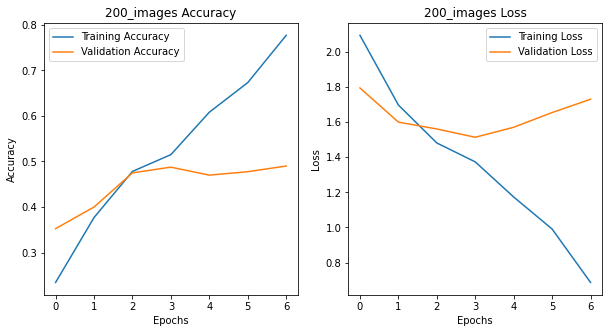

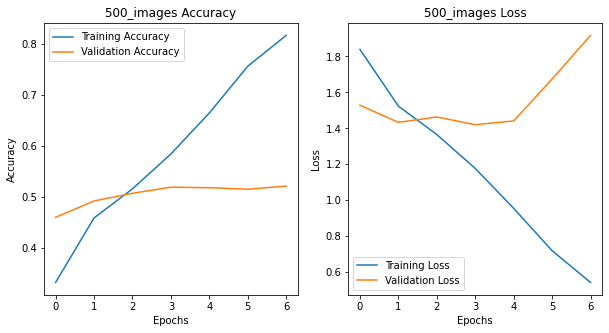

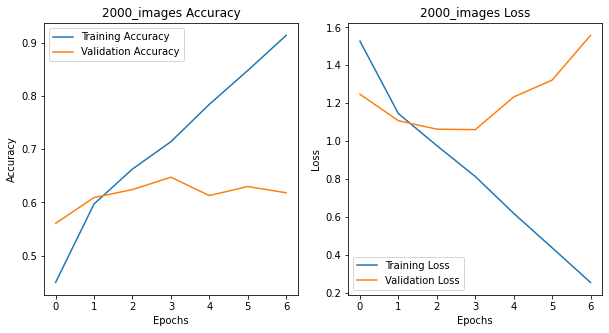

In [0]:
import matplotlib.pyplot as plt

def plot_results(results):
    for dataset_name, metrics in results.items():
        plt.figure(figsize=(10, 5))

        # Accuracy Plot
        plt.subplot(1, 2, 1)
        plt.plot(metrics['history']['accuracy'], label='Training Accuracy')
        plt.plot(metrics['history']['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{dataset_name} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss Plot
        plt.subplot(1, 2, 2)
        plt.plot(metrics['history']['loss'], label='Training Loss')
        plt.plot(metrics['history']['val_loss'], label='Validation Loss')
        plt.title(f'{dataset_name} Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

plot_results(results)

### 5.2 Predicting Model Accuracy
The script defines a sigmoid function to model the relationship between dataset size and accuracy. It fits the sigmoid curve to training results from multiple dataset sizes, then predicts the accuracy for a target dataset size (e.g., 100,000 images). The predicted accuracy is clipped to a range of 0 to 1 and displayed as a percentage.

In [0]:
import numpy as np
from scipy.optimize import curve_fit

# Define the sigmoid function with a constraint for L to not exceed 1 (100% accuracy)
def sigmoid(x, L=1, x0=1000, k=1):
    return L / (1 + np.exp(-k * (np.log(x) - np.log(x0))))

def predict_large_dataset_accuracy(results, target_size=100000):
    dataset_sizes = np.array([200, 500, 2000])
    accuracies = np.array([results[ds]['accuracy'] for ds in results.keys()])

    # Fit sigmoid model with parameter bounds
    initial_guess = [1, 1000, 1]
    bounds = ([0, 1, 0], [1, np.inf, np.inf])  # Constrain L to [0, 1], other parameters unconstrained
    popt, _ = curve_fit(sigmoid, dataset_sizes, accuracies, p0=initial_guess, bounds=bounds, maxfev=20000)
    
    predicted_accuracy = sigmoid(target_size, *popt)

    # Clip predicted accuracy to [0, 1] range
    predicted_accuracy = np.clip(predicted_accuracy, 0, 1)

    print(f"Predicted Accuracy for {target_size} images: {predicted_accuracy * 100:.2f}%")
    return predicted_accuracy

# Example usage
results = {
    200: {'accuracy': 0.529},
    500: {'accuracy': 0.533},
    2000: {'accuracy': 0.637}
}

predict_large_dataset_accuracy(results)


/local_disk0/.ephemeral_nfs/envs/pythonEnv-24d483d6-9c36-4508-9a43-75ef39586032/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
 warnings.warn('Covariance of the parameters could not be estimated',
Predicted Accuracy for 100000 images: 78.57%
Out[32]: 0.7857037001059297

In [0]:
# List all the models accuracies
model_accuracies = {dataset_size: metrics['accuracy'] for dataset_size, metrics in results.items()}
display(pd.DataFrame(model_accuracies.items(), columns=['Dataset Size', 'Accuracy']))

Dataset Size,Accuracy
200,0.529
500,0.533
2000,0.637


The above model predicts an accuracy of approximately 78.57% for a dataset containing 100,000 images, based on a sigmoid curve fitting approach.

The above table shows the accuracy of the model on datasets of varying sizes: 200 images (52.9%), 500 images (53.3%), and 2000 images (63.7%). Since the model has achieved highest accuracy for 2000 images, the corresponding model is saved and used for further processing. This indicates improved performance with larger datasets.

### 5.3 Load Pre Trained Model
The script loads the pre-trained model from the specified file path , which contains the best model saved during training for the dataset with 2000 images.

In [0]:
best_model_path = "./2000_images_best_model.h5"

In [0]:
model = tf.keras.models.load_model(best_model_path)

##6. Model Evaluation and Testing

### 6.1 Test and Evaluate Saved Model
The script loads a saved model, preprocesses test data using ImageDataGenerator, and evaluates the model on the test dataset. It calculates test loss and accuracy, generates predictions, and compares them to true labels using a classification report. Additionally, it displays a confusion matrix to visualize model performance.

Found 12 images belonging to 10 classes.
1/1 [==============================] - ETA: 0s - loss: 1.9833 - accuracy: 0.16671/1 [==============================] - 0s 371ms/step - loss: 1.9833 - accuracy: 0.1667
Test Loss: 1.9833379983901978
Test Accuracy: 0.1666666716337204
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 203ms/step
/databricks/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 _warn_prf(average, modifier, msg_start, len(result))
 precision recall f1-score support

 Fountain 0.00 0.00 0.00 2
 Gas Station 0.00 0.00 0.00 1
 Glacier 0.00 0.00 0.00 1
 Hayfield 0.50 1.00 0.67 1
 Iceberg 0.00 0.00 0.00 1
 Igloo 0.00 0.00 0.00 1
 Lawn 1.00 1.00 1.00 1
 Palace 0.00 0.00 0.00 2
 Run way 0.00 0.00 0.00 1
 Skyscrapper 0.00 0.00 0.00 1

 accuracy 0.17 12
 macro avg 0.15 0.20 0.17 12
weighted avg 0.12 0.17 0.14 12

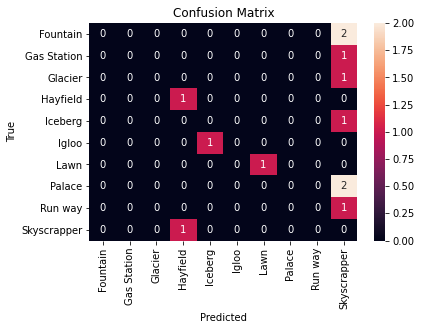

In [0]:
%python
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

test_data_path = "/dbfs/mnt/input/test"

def test_saved_model(saved_model_path, test_data_path):
    # Load the saved model
    model = tf.keras.models.load_model(saved_model_path)

    # Preprocess test data
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_data = datagen.flow_from_directory(
        test_data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_data)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")

    # Generate predictions
    predictions = model.predict(test_data)
    predicted_classes = np.argmax(predictions, axis=1)

    # True labels
    true_classes = test_data.classes
    class_labels = list(test_data.class_indices.keys())

    # Confusion matrix
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns

    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Test the model with the specified test dataset path
test_saved_model(local_model_path, test_data_path)

###6.2 Display Predictions
The script loads a saved model, preprocesses test data, and generates predictions. It compares the predicted labels with true labels and creates a DataFrame displaying the results.

In [0]:
import pandas as pd

def display_predictions(saved_model_path, test_data_path):
    # Load the saved model
    model = tf.keras.models.load_model(saved_model_path)

    # Preprocess test data
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_data = datagen.flow_from_directory(
        test_data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Generate predictions
    predictions = model.predict(test_data)
    predicted_classes = np.argmax(predictions, axis=1)

    # True labels
    true_classes = test_data.classes
    class_labels = list(test_data.class_indices.keys())

    # Create a DataFrame with filenames, true labels, and predicted labels
    filenames = test_data.filenames
    results_df = pd.DataFrame({
        'Filename': filenames,
        'TrueLabel': [class_labels[i] for i in true_classes],
        'PredictedLabel': [class_labels[i] for i in predicted_classes]
    })

    # Add a column to indicate if the prediction is correct
    results_df['Correct'] = results_df['TrueLabel'] == results_df['PredictedLabel']

    # Display correct predictions
    correct_predictions = results_df[results_df['Correct'] == True]
    display(correct_predictions)

    # Display incorrect predictions
    incorrect_predictions = results_df[results_df['Correct'] == False]
    display(incorrect_predictions)

# Test the model and display predictions
display_predictions(best_model_path, test_data_path)

Found 12 images belonging to 10 classes.
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 215ms/step

Filename,TrueLabel,PredictedLabel,Correct
Fountain/00003151.jpg,Fountain,Fountain,true
Gas Station/00000006.jpg,Gas Station,Gas Station,true
Hayfield/00000058.jpg,Hayfield,Hayfield,true
Igloo/00000048.jpg,Igloo,Igloo,true
Lawn/00000060.jpg,Lawn,Lawn,true
Palace/00003999.jpg,Palace,Palace,true
Skyscrapper/00000078.jpg,Skyscrapper,Skyscrapper,true


Filename,TrueLabel,PredictedLabel,Correct
Fountain/00003153.jpg,Fountain,Gas Station,false
Glacier/00000007.jpg,Glacier,Igloo,false
Iceberg/00000007.jpg,Iceberg,Skyscrapper,false
Palace/00004004.jpg,Palace,Skyscrapper,false
Run way/00000049.jpg,Run way,Skyscrapper,false


Out of the 12 images tested, the model correctly predicted 7 images while making incorrect predictions for 5 images.

###6.3 Visualize Model Predictions with Images
This script visualizes the predictions made by a trained model by displaying test images with their corresponding true and predicted labels, enabling a visual assessment of the model's performance.

Found 12 images belonging to 10 classes.
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 204ms/step

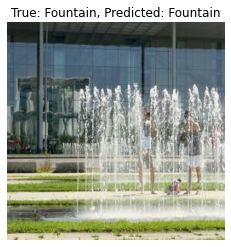

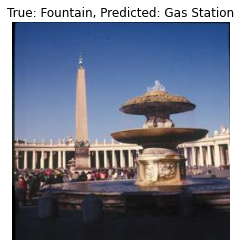

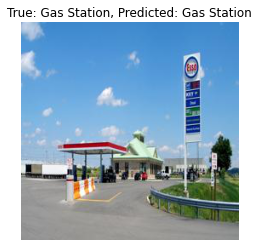

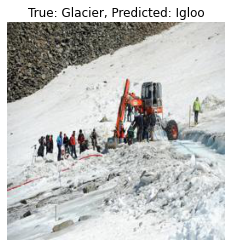

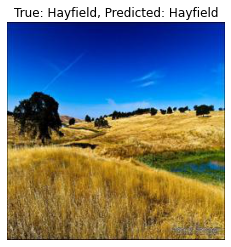

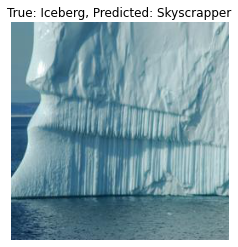

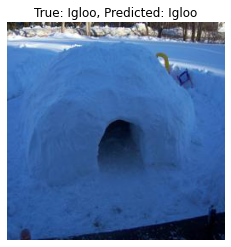

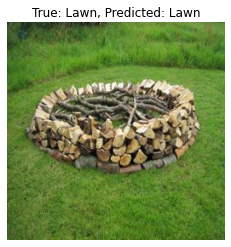

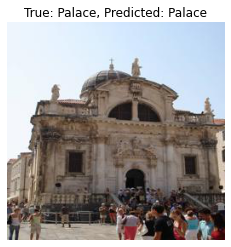

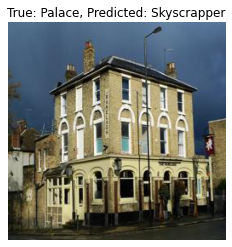

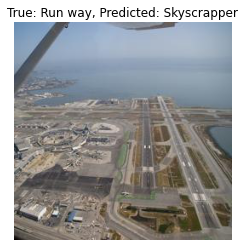

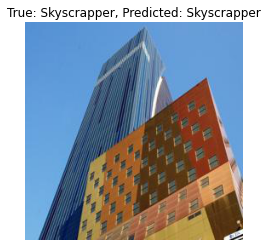

In [0]:
import matplotlib.pyplot as plt

def display_predictions_with_images(saved_model_path, test_data_path):
    # Load the saved model
    model = tf.keras.models.load_model(saved_model_path)

    # Preprocess test data
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    test_data = datagen.flow_from_directory(
        test_data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Generate predictions
    predictions = model.predict(test_data)
    predicted_classes = np.argmax(predictions, axis=1)

    # True labels
    true_classes = test_data.classes
    class_labels = list(test_data.class_indices.keys())

    # Create a DataFrame with filenames, true labels, and predicted labels
    filenames = test_data.filenames
    results_df = pd.DataFrame({
        'Filename': filenames,
        'TrueLabel': [class_labels[i] for i in true_classes],
        'PredictedLabel': [class_labels[i] for i in predicted_classes]
    })

    # Add a column to indicate if the prediction is correct
    results_df['Correct'] = results_df['TrueLabel'] == results_df['PredictedLabel']

    # Display images with predicted and true labels
    for i in range(len(filenames)):
        img = plt.imread(f"{test_data_path}/{filenames[i]}")
        plt.imshow(img)
        plt.title(f"True: {results_df['TrueLabel'][i]}, Predicted: {results_df['PredictedLabel'][i]}")
        plt.axis('off')
        plt.show()

# Test the model and display predictions with images
display_predictions_with_images(best_model_path, test_data_path)